# Clustering in Real World


## notes


* Dominant colours in images
  * Pixels - Red, Green, Blue (0-255)
  * Satallite images into land, water, clouds, etc

`matplotlib.image.imread` - Convert image to pixels
`matplotlib.pyplot.imshow` - Display colours of cluster centres


```python

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image = img.imread('image.jpg')
image.shape

r = []
g = []
b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

pixels = pd.DataFrame({'red': r, 'blue': b, 'green': g})
pixels.head()

# elbow plot - to get clusters (dominant colours)

distortions = []
num_clusters = range(1, 11)

for i in num_clusters:
    cluster_centers, distortion = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# dominant colours

cluster_centers, _ = kmeans(pixels[['scaled_red', 'scaled_blue', 'scaled_green']], 3)

colours = []
r_std, g_std, b_std = pixels[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colours.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# display dominant colours
print(colours)

# dimensions 1x23 (1xNx3 matrix)
plt.imshow([colours])
plt.show()

``` 

## example 1 - batman

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# import images
batman_img = mpimg.imread('batman.jpg')
#clifton_img = mpimg.imread('clifton.jpg')

# print dimensions
print(batman_img.shape)
#print(clifton_img.shape)



(608, 1466, 3)


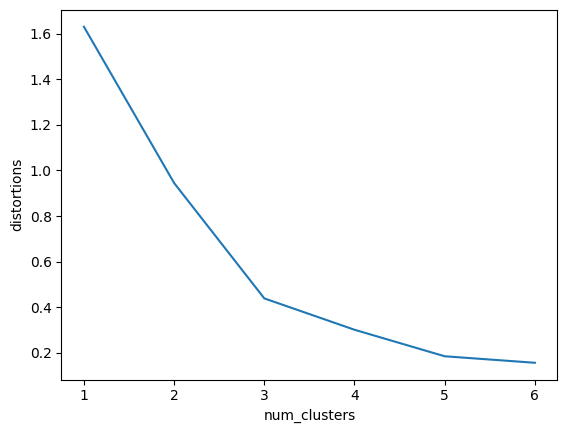

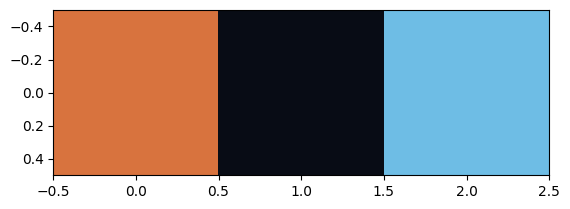

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans

# store rgb values of pixels in lists
batman_r = []
batman_g = []
batman_b = []

for row in batman_img:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        batman_r.append(temp_r)
        batman_g.append(temp_g)
        batman_b.append(temp_b)

# create batman_df
batman_df = pd.DataFrame({'red': batman_r,
                          'blue': batman_b,
                          'green': batman_g})

# scale rgb values with whiten() function
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

distortions = []
num_clusters = range(1, 7)

# create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']], i)
    distortions.append(distortion)

# create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})

# create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Based on the elbow plot, set the optimal number of clusters
optimal_clusters = 3

# Perform k-means clustering with the optimal number of clusters
cluster_centers, distortion = kmeans(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']], optimal_clusters)

# get std for each colour
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colours = []
for cluster_center in cluster_centers:
    scaled_b, scaled_g, scaled_r = cluster_center
    colours.append((scaled_r * r_std, scaled_g * g_std, scaled_b * b_std))

# Normalize the colours to be in the range [0, 1]
colours = [(r/255, g/255, b/255) for r, g, b in colours]

plt.imshow([colours])
plt.show()

![batman-image](batman.jpg)

## mini-batch k-means

* Faster than k-means
* Randomly sample subsets of data
* 

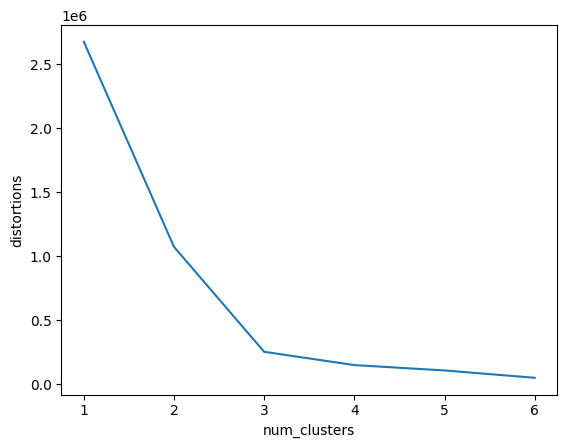

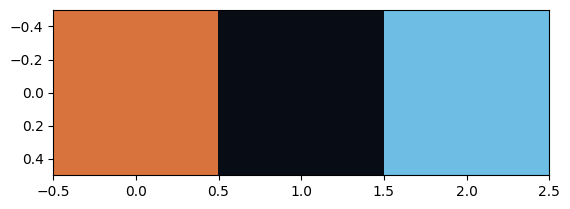

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.vq import whiten

# store rgb values of pixels in lists
batman_r = []
batman_g = []
batman_b = []

for row in batman_img:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        batman_r.append(temp_r)
        batman_g.append(temp_g)
        batman_b.append(temp_b)

# create batman_df
batman_df = pd.DataFrame({'red': batman_r,
                          'blue': batman_b,
                          'green': batman_g})

# scale rgb values with whiten() function
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])


distortions = []
num_clusters = range(1, 7)

# create a list of distortions from the MiniBatchKMeans function
for i in num_clusters:
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, n_init='auto')
    kmeans.fit(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']])
    distortions.append(kmeans.inertia_)

# create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})

# create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

# Based on the elbow plot, set the optimal number of clusters
optimal_clusters = 3

# Perform MiniBatchKMeans clustering with the optimal number of clusters
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, batch_size=1000, n_init='auto')
kmeans.fit(batman_df[['scaled_blue', 'scaled_green', 'scaled_red']])
cluster_centers = kmeans.cluster_centers_

# get std for each colour
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

colours = []
for cluster_center in cluster_centers:
    scaled_b, scaled_g, scaled_r = cluster_center
    colours.append((scaled_r * r_std, scaled_g * g_std, scaled_b * b_std))

# Normalize the colours to be in the range [0, 1]
colours = [(r/255, g/255, b/255) for r, g, b in colours]

plt.imshow([colours])
plt.show()

## clifton image

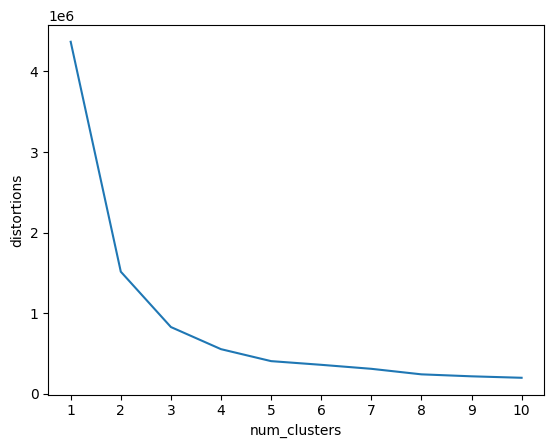

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.vq import whiten
from skimage import io

# Load the image
image = io.imread('clifton.jpg')

# store rgb values of pixels in lists
image_r = []
image_g = []
image_b = []

for row in image:
    for pixel in row:
        temp_r, temp_g, temp_b = pixel
        image_r.append(temp_r)
        image_g.append(temp_g)
        image_b.append(temp_b)

# create image_df
image_df = pd.DataFrame({'red': image_r,
                         'blue': image_b,
                         'green': image_g})

# scale rgb values with whiten() function
image_df['scaled_red'] = whiten(image_df['red'])
image_df['scaled_blue'] = whiten(image_df['blue'])
image_df['scaled_green'] = whiten(image_df['green'])


distortions = []
num_clusters = range(1, 11)

# create a list of distortions from the MiniBatchKMeans function
for i in num_clusters:
    kmeans = MiniBatchKMeans(n_clusters=i, batch_size=1000, n_init='auto')
    kmeans.fit(image_df[['scaled_blue', 'scaled_green', 'scaled_red']])
    distortions.append(kmeans.inertia_)

# create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters,
                           'distortions': distortions})

# create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()


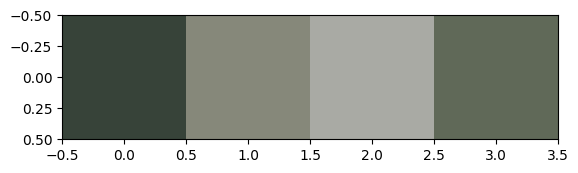

In [5]:

# Based on the elbow plot, set the optimal number of clusters
# Here, you should visually inspect the elbow plot and set the optimal number of clusters
optimal_clusters = 4  # Replace this with the number you determine from the elbow plot

# Perform MiniBatchKMeans clustering with the optimal number of clusters
kmeans = MiniBatchKMeans(n_clusters=optimal_clusters, batch_size=1000, n_init='auto')
kmeans.fit(image_df[['scaled_blue', 'scaled_green', 'scaled_red']])
cluster_centers = kmeans.cluster_centers_

# get std for each colour
r_std, g_std, b_std = image_df[['red', 'green', 'blue']].std()

colours = []
for cluster_center in cluster_centers:
    scaled_b, scaled_g, scaled_r = cluster_center
    colours.append((scaled_r * r_std, scaled_g * g_std, scaled_b * b_std))

# Normalize the colours to be in the range [0, 1]
colours = [(r/255, g/255, b/255) for r, g, b in colours]

plt.imshow([colours])
plt.show()

![clifton-image](clifton.jpg)